In [64]:
from bs4 import BeautifulSoup

filep = '/Users/ath/Documents/GoogleSearches/Takeout/My Activity/Search/'


First we start by importing the data into python and getting them in a usable format!

In [65]:
f2imp = filep+'MyActivity.html'

with open(f2imp) as fp:
    soup = BeautifulSoup(fp)

divs = soup.find_all('div', class_="content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1")

search_queries = []
dates = []

for element in divs:
    if str(element.contents[0]).startswith('Searched'):
        search_queries.append(element.contents[1].text.split())
        dates.append(element.contents[-1])

/Users/ath/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Now we remove stopwords and convert dates to datetimeobjects

In [336]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_words = [[word for word in single_search if word not in stopwords.words('english')] for single_search in search_queries]

from datetime import datetime, time

formated_dates = [datetime.strptime(sdate, "%b %d, %Y, %I:%M:%S %p") for sdate in dates]


In [337]:
single_words = []
single_dates = []
for search,timepoint in zip(filtered_words, formated_dates):
    for word in search:
        single_words.append(word.replace("\"", "").replace("“", "").replace('\'', '').replace('‘', ''))
        single_dates.append(timepoint)


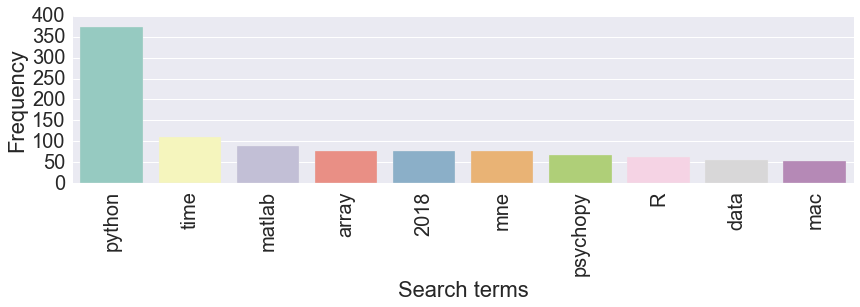

In [414]:
import pandas as pd
from collections import Counter, OrderedDict
import numpy as np
import matplotlib.pyplot as plt

searches_df = pd.DataFrame({'Searches' : single_words,
 'Dates' : single_dates}, columns=['Searches','Dates'])

%matplotlib inline 
fig=plt.figure(figsize=(14, 3), dpi= 80, facecolor='w', edgecolor='k')

items2plot = 10
cpalette = sns.color_palette("Set3", items2plot)

searches_counted = searches_df.groupby('Searches').count().sort_values(by=['Dates'],ascending=False).reset_index()

dictPalette = {}
for counter,search_term in enumerate(list(searches_counted[:items2plot]['Searches'])):
    dictPalette[search_term] = cpalette[counter]


sns.set(font_scale = 2)
sns.barplot(y='Dates',
            x='Searches',
            data=searches_counted[:items2plot], palette=cpalette)

plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Search terms')

In [415]:
def export_year_month(x):
    return datetime.strptime(datetime.strftime(x, '%Y-%m'),'%Y-%m')

searches_df['year_month'] = searches_df['Dates'].apply(export_year_month)

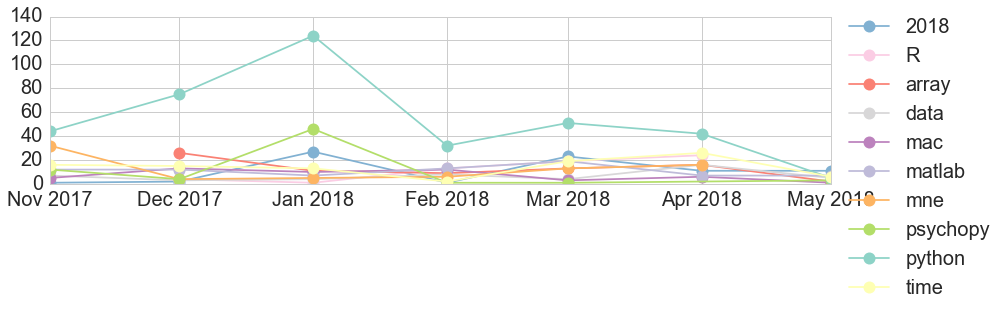

In [416]:
searches_by_month = searches_df.groupby(['Searches','year_month']).count().reset_index()
top_queries = searches_by_month[searches_by_month['Searches'].isin(list(searches_counted[:items2plot]['Searches']))]

%matplotlib inline 

plt.style.use('seaborn-whitegrid')
#sns.set(font_scale = 2) 
fig, ax = plt.subplots(figsize=(14, 3))
counter = 0
for name, group in top_queries[top_queries['year_month']>datetime.strptime('2017-10-01', '%Y-%m-%d')].groupby('Searches'):
    ax.plot(group.year_month, group.Dates, marker = 'o', ms=12, label = name, color = dictPalette[name])
    counter +=1
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.1),
          ncol=1, fancybox=True, shadow=True)

plt.show()


Now we want to export the hour of the day for the most common searches:

In [417]:
def export_hour(x):
    return int(datetime.strftime(x, '%H'))

searches_df['Hour'] = searches_df['Dates'].apply(export_hour)

For plotting purposes data can be transformed into a dataframe:

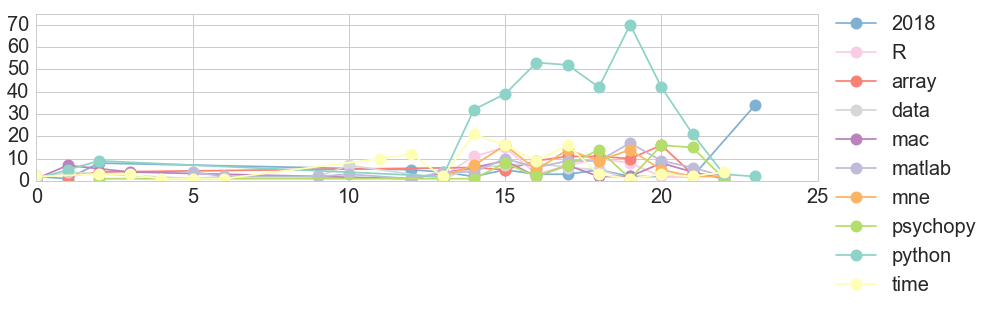

In [418]:
searches_by_hour = searches_df.groupby(['Searches','Hour']).count().reset_index()
top_queries_hour = searches_by_hour[searches_by_hour['Searches'].isin(list(searches_counted[:items2plot]['Searches']))]

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(14, 3))
counter = 0
for name, group in top_queries_hour.groupby('Searches'):
    ax.plot(group.Hour, group.Dates, marker = 'o', ms=12, label = name, color = dictPalette[name])
    counter +=1
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.1),
          ncol=1, fancybox=True, shadow=True)
plt.ylim(0,75)
plt.show()

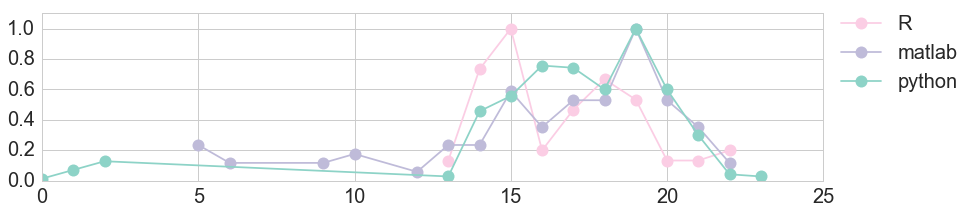

In [419]:
searches_by_programming = searches_df.groupby(['Searches','Hour']).count().reset_index()
top_queries_programming = searches_by_hour[searches_by_programming['Searches'].isin(['python', 'matlab','R'])]

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(14, 3))
counter = 0
for name, group in top_queries_programming.groupby('Searches'):
    ax.plot(group.Hour, group.Dates/pd.Series.max(group.Dates), marker = 'o', ms=12, label = name, color = dictPalette[name])
    counter +=1
    
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.1),
          ncol=1, fancybox=True, shadow=True)
plt.ylim(0,1.1)
plt.show()